In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1


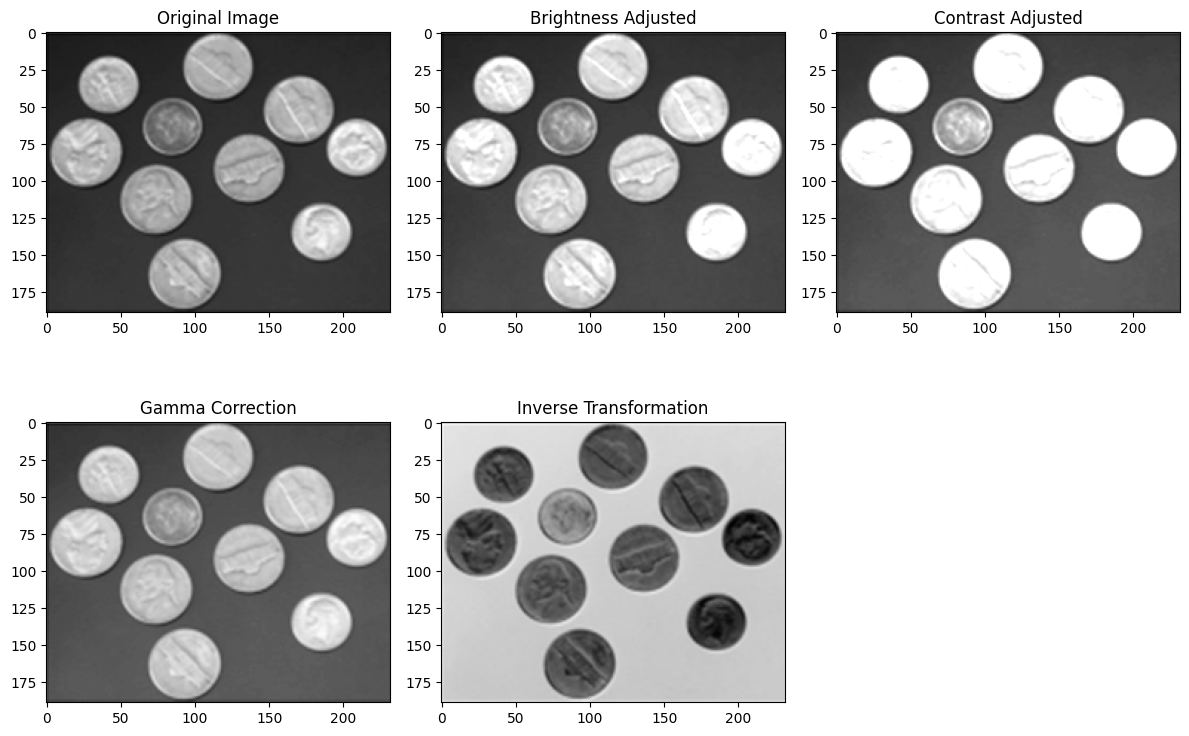

In [ ]:
image = cv2.imread("coin.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bright_image = cv2.convertScaleAbs(gray_image, alpha=1, beta=50)

alpha = 1.5
beta = 0
contrast_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

gamma = 2.2
gamma_correction_image = np.array(
    255 * (gray_image / 255) ** (1 / gamma), dtype="uint8"
)

negative_image = 255 - gray_image

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(bright_image, cmap="gray")
plt.title("Brightness Adjusted")

plt.subplot(2, 3, 3)
plt.imshow(contrast_image, cmap="gray")
plt.title("Contrast Adjusted")

plt.subplot(2, 3, 4)
plt.imshow(gamma_correction_image, cmap="gray")
plt.title("Gamma Correction")

plt.subplot(2, 3, 5)
plt.imshow(negative_image, cmap="gray")
plt.title("Inverse Transformation")

plt.tight_layout()
plt.show()

# Task 2


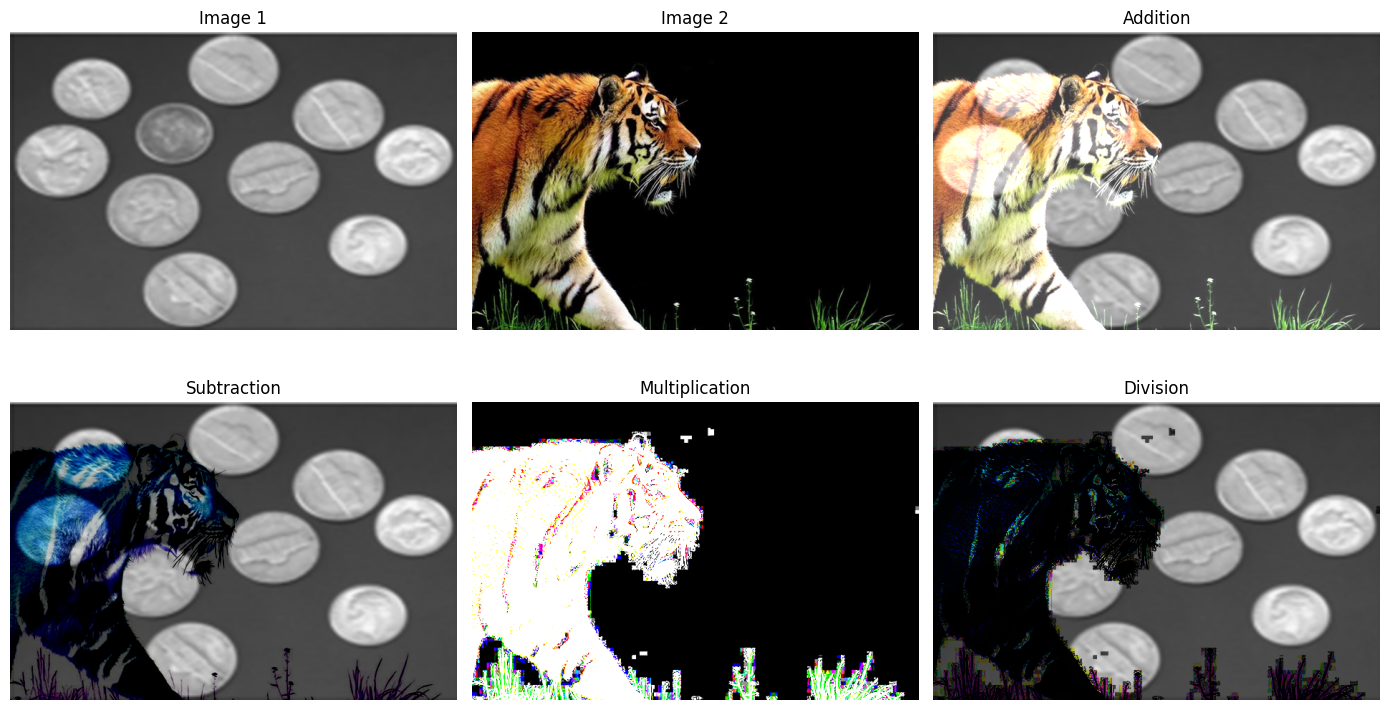

In [ ]:
image1 = cv2.imread("coin.png")
image2 = cv2.imread("tiger.png")

image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

added_image = cv2.add(image1, image2)
subtracted_image = cv2.subtract(image1, image2)
multiplied_image = cv2.multiply(image1, image2)
divided_image = cv2.divide(image1, (image2 + 1))

plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB))
plt.title("Addition")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB))
plt.title("Subtraction")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(multiplied_image, cv2.COLOR_BGR2RGB))
plt.title("Multiplication")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(divided_image, cv2.COLOR_BGR2RGB))
plt.title("Division")
plt.axis("off")

plt.tight_layout()
plt.show()

# Task 3


In [ ]:
foreground_image = cv2.imread("green_screen_image.jpg")
background_image1 = cv2.imread("background1.jpg")
background_image2 = cv2.imread("background2.jpg")
background_image3 = cv2.imread("background3.jpg")

background_image1 = cv2.resize(
    background_image1, (foreground_image.shape[1], foreground_image.shape[0])
)
background_image2 = cv2.resize(
    background_image2, (foreground_image.shape[1], foreground_image.shape[0])
)
background_image3 = cv2.resize(
    background_image3, (foreground_image.shape[1], foreground_image.shape[0])
)

hsv_image = cv2.cvtColor(foreground_image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_image, lower_green, upper_green)

mask_inv = cv2.bitwise_not(mask)

fg_part = cv2.bitwise_and(foreground_image, foreground_image, mask=mask_inv)

bg_part1 = cv2.bitwise_and(background_image1, background_image1, mask=mask)
bg_part2 = cv2.bitwise_and(background_image2, background_image2, mask=mask)
bg_part3 = cv2.bitwise_and(background_image3, background_image3, mask=mask)

final_image1 = cv2.add(fg_part, bg_part1)
final_image2 = cv2.add(fg_part, bg_part2)
final_image3 = cv2.add(fg_part, bg_part3)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(final_image1, cv2.COLOR_BGR2RGB))
plt.title("Background 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(final_image2, cv2.COLOR_BGR2RGB))
plt.title("Background 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(final_image3, cv2.COLOR_BGR2RGB))
plt.title("Background 3")
plt.axis("off")

plt.tight_layout()
plt.show()

# Task 4


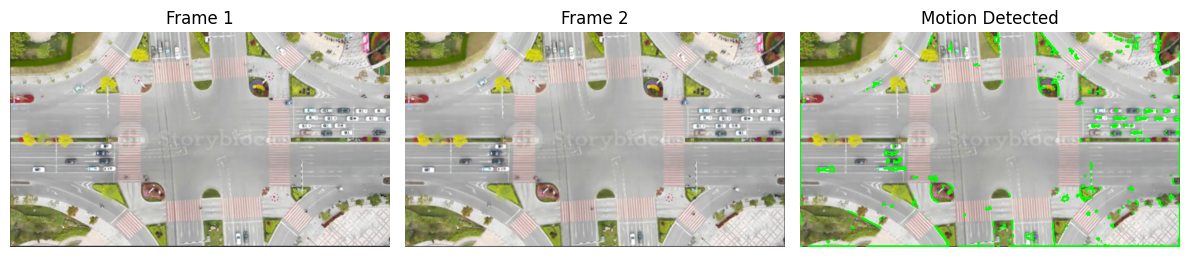

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

frame1 = cv2.imread("frame1.png")  # Replace with the actual path to the first image
frame2 = cv2.imread("frame2.png")  # Replace with the actual path to the second image

frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))

gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

frame_diff = cv2.absdiff(gray1, gray2)

_, thresh = cv2.threshold(frame_diff, 50, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
thresh = cv2.morphologyEx(
    thresh, cv2.MORPH_CLOSE, kernel
)  # Close operation to fill gaps

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

motion_frame = frame2.copy()
cv2.drawContours(motion_frame, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title("Frame 1")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title("Frame 2")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(motion_frame, cv2.COLOR_BGR2RGB))
plt.title("Motion Detected")

plt.tight_layout()
plt.show()